In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

I am going to cluster customers with Kmeans clustering algorithm to make several group of customers.

In [2]:
X = np.genfromtxt('X.csv',delimiter=',')
Y = np.genfromtxt('Y.csv',delimiter=',')
df = pd.read_csv('df_final.csv',index_col=0)

In [3]:
df.head()

,job,marital,education,default,housing,loan,contact,month,y,age,balance,day,duration,campaign
0,1,1,3,0,1,0,0,5,0,58,2143,5,261,1
1,2,0,2,0,1,0,0,5,0,44,29,5,151,1
2,3,1,2,0,1,1,0,5,0,33,2,5,76,1
3,4,1,0,0,1,0,0,5,0,47,1506,5,92,1
4,0,0,0,0,0,0,0,5,0,33,1,5,198,1


In [4]:
wcss=[]

for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

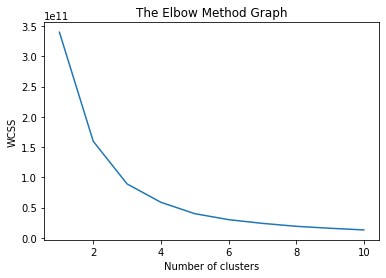

In [5]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here we can select 4 or 5 as cluster size. I will select 5.

In [6]:
kmeans = KMeans(n_clusters=5, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X)

In [7]:
df['cluster'] = y_kmeans
df.head()

,job,marital,education,default,housing,loan,contact,month,y,age,balance,day,duration,campaign,cluster
0,1,1,3,0,1,0,0,5,0,58,2143,5,261,1,2
1,2,0,2,0,1,0,0,5,0,44,29,5,151,1,0
2,3,1,2,0,1,1,0,5,0,33,2,5,76,1,0
3,4,1,0,0,1,0,0,5,0,47,1506,5,92,1,0
4,0,0,0,0,0,0,0,5,0,33,1,5,198,1,0


In [8]:
df_group = df.groupby(['cluster', 'y']).size().reset_index(name='counts')
df_group["percentage"] = list(range(10))

In [9]:
for i in range(0,5):
    df_group.at[(2*i), "percentage"] = 100*np.double(df_group["counts"][2*i]/(df_group["counts"][2*i]+df_group["counts"][2*i+1]))
    df_group.at[(2*i+1),"percentage"] = 100*np.double(df_group["counts"][2*i+1]/(df_group["counts"][2*i]+df_group["counts"][2*i+1]))

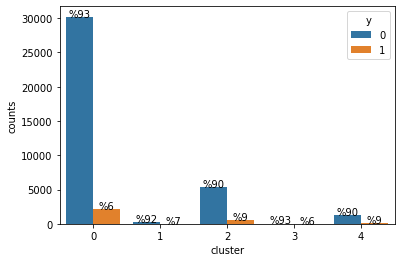

In [10]:
ax = sns.barplot(x='cluster',hue="y",y="counts",data=df_group)
i = -2
for p in ax.patches:
    i = i+2
    if i > 9:
        i = i-9
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = df_group["percentage"][i]
    ax.text(_x, _y, "%"+str(value), ha="center") 

As we can see from the graph categorized by groups and subscription,group number 2 and 4 gives best percentage of subscription. We can categorize new customers in these five groups and if they are from group 2 or group 4, we can focus on them.

In [11]:
np.savetxt("cluster_centers.csv", kmeans.cluster_centers_, delimiter=",")